In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
from autocorrect import Speller
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

C:\Users\dhruv\AppData\Local\Temp\ipykernel_6472\417081888.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('final_tokenized.csv', header=None)
data

,0,1,2
0,VideoID,Comment,Class
1,8mAITcNt710,poor man wear mask,Negative
2,8mAITcNt710,free dawg,Positive
3,8mAITcNt710,wow never knew would actually learn free onlin...,Positive
4,8mAITcNt710,insane free thing watch online,Positive
...,...,...,...
68714,raos5cz4Fgc,family watching race live screaming like max c...,Imperative
68715,raos5cz4Fgc,love max oversteering last corner shows confid...,Positive
68716,raos5cz4Fgc,ok next years hope better,Positive
68717,raos5cz4Fgc,best moment whole life,Positive


In [4]:
data[2].unique()


array(['Class', 'Negative', 'Positive', 'Imperative', 'Interrogative',
       'Corrective'], dtype=object)

In [5]:
data.duplicated().any()


True

In [6]:
data.isnull().sum()


0    0
1    0
2    0
dtype: int64

In [7]:
data.shape


(68719, 3)

In [8]:
df=data
df=df.drop(df.columns[0], axis=1)

df = pd.DataFrame(df)

In [9]:
df

,1,2
0,Comment,Class
1,poor man wear mask,Negative
2,free dawg,Positive
3,wow never knew would actually learn free onlin...,Positive
4,insane free thing watch online,Positive
...,...,...
68714,family watching race live screaming like max c...,Imperative
68715,love max oversteering last corner shows confid...,Positive
68716,ok next years hope better,Positive
68717,best moment whole life,Positive


In [25]:
df.iloc[:, 0] = df.iloc[:, 0].str.replace('http\S+|www.\S+', '', case=False)
df.iloc[:, 0] = df.iloc[:, 0].str.replace('\n', ' ', regex=True)
df.iloc[:, 0] = df.iloc[:, 0].str.replace('[^\w\s]', ' ')
df.iloc[:, 0] = df.iloc[:, 0].str.replace('\d', '', regex=True)
df.iloc[:, 0] = df.iloc[:, 0].str.replace('[^\w\s#@/:%.,_-]', ' ', flags=re.UNICODE)

# Display the DataFrame
print(df)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\dhruv\AppData\Local\Temp\ipykernel_6472\1891209661.py:1: SyntaxWarning: invalid escape sequence '\S'
  df.iloc[:, 0] = df.iloc[:, 0].str.replace('http\S+|www.\S+', '', case=False)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_6472\1891209661.py:3: SyntaxWarning: invalid escape sequence '\w'
  df.iloc[:, 0] = df.iloc[:, 0].str.replace('[^\w\s]', ' ')
C:\Users\dhruv\AppData\Local\Temp\ipykernel_6472\1891209661.py:4: SyntaxWarning: invalid escape sequence '\d'
  df.iloc[:, 0] = df.iloc[:, 0].str.replace('\d', '', regex=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_6472\1891209661.py:5:

                                                       1           2
0                                                Comment       Class
1                                     poor man wear mask    Negative
2                                              free dawg    Positive
3      wow never knew would actually learn free onlin...    Positive
4                         insane free thing watch online    Positive
...                                                  ...         ...
68714  family watching race live screaming like max c...  Imperative
68715  love max oversteering last corner shows confid...    Positive
68716                          ok next years hope better    Positive
68717                             best moment whole life    Positive
68718  got ta love seeing ham fanboys cry almost week...    Positive

[68719 rows x 2 columns]


In [35]:
# Removing stopwords
# nltk.download('stopwords')

stop = stopwords.words('english')

# These are the words that should not be removed from their category
negative_words = ['no','not']
interrogative_words = ['how','what','which','who','whom','why','do','does','is','are','was','were','will','am',
                      'are','could','would','should','can','did','does','do','had','have']
imperative_words = ['could','would','should','can']

for_negative_category = stop.copy()
for word in negative_words:
    if word in for_negative_category:
        for_negative_category.remove(word)
    
for_interrogative_category = stop.copy()
for word in interrogative_words:
    if word in for_interrogative_category:
        for_interrogative_category.remove(word)
    
for_imperative_category = stop.copy()
for word in imperative_words:
    if word in for_imperative_category:
        for_imperative_category.remove(word)

# For negative category
for i in range(len(df)):
    if df[1][i] == "negative":
        df[0][i] = ' '.join([word for word in df[0][i].split() if word not in for_negative_category])

# For interrogative category
for i in range(len(df)):
    if df[1][i] == "interrogative":
        df[0][i] = ' '.join([word for word in df[0][i].split() if word not in for_interrogative_category])
        
# For interrogative category
for i in range(len(df)):
    if df[1][i] == "imperative":
        df[0][i] = ' '.join([word for word in df[0][i].split() if word not in for_imperative_category])
        
# For all other category
for i in range(len(df)):
    if df[1][i] == "positive" or df[1][i] == "correction" or df[1][i] == "other":
        df[0][i] = ' '.join([word for word in df[0][i].split() if word not in stop])

# df[0] = df[0].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df

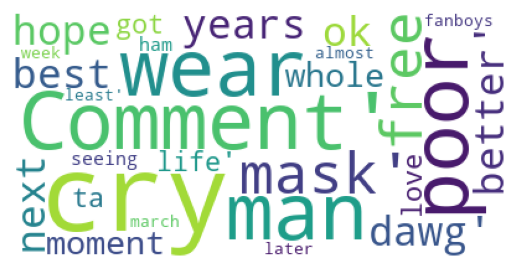

In [37]:
from wordcloud import WordCloud
text = df.iloc[:, 0].values 

wordcloud = WordCloud(background_color='white',collocations=False).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
df.shape


(68719, 2)

In [38]:
import math 

N_occurance = 5


words = [df.iloc[i, 0].split() for i in range(len(df))]
bag_of_words = sorted(list({word for list_ in words for word in list_}))
word_count = {word:0 for word in bag_of_words}
for word in bag_of_words:
    for list_ in words:
        if word in list_:
            word_count[word]+=1
filtered_words = [k for k,v in word_count.items() if v>N_occurance]
evaluation = np.zeros((len(df),len(filtered_words)))
for i in range(len(words)):
    counter = Counter(words[i])
    for k, v in counter.items():
        if k not in filtered_words:
            continue
        count = [1 for list_ in words if k in list_]
        evaluation[i][filtered_words.index(k)] = sum(count)/len(words)

# print(filtered_words)
evaluation.shape

KeyboardInterrupt: 